# Multi model analysis

### Load modules

In [1]:
import sys
from IPython import get_ipython
from IPython.lib.deepreload import reload

%load_ext autoreload
%autoreload 2
from aqua import Reader
from ocean3d import load_obs_data
from ocean3d import check_variable_name
from ocean3d.ocean_circulation.multi_model.startification import stratification
from ocean3d.ocean_circulation.multi_model.mld_spatial import mld_multi_model
from ocean3d.ocean_drifts.multi_model.time_series import time_series
from ocean3d.ocean_drifts.multi_model.trends import trend

### Load Data

In [2]:
# Observation
en4_reader = Reader(model='EN4', exp='en4', source="monthly")
en4_1 = en4_reader.retrieve(startdate="1990", enddate="2005")
en4_1 = check_variable_name(en4_1)
en4_2 = en4_reader.retrieve(startdate="2006", enddate="2020")
en4_2 = check_variable_name(en4_2)

# IFS-NEMO Historical
ifs_nemo_historical_reader = Reader(model='IFS-NEMO', exp='historical-1990', source="lra-r100-monthly")
ifs_nemo_historical = ifs_nemo_historical_reader.retrieve()
ifs_nemo_historical = check_variable_name(ifs_nemo_historical)

# IFS-NEMO Projection
ifs_nemo_ssp370_reader = Reader(model='IFS-NEMO', exp='ssp370', source="lra-r100-monthly")
ifs_nemo_ssp370 = ifs_nemo_ssp370_reader.retrieve()
ifs_nemo_ssp370 = check_variable_name(ifs_nemo_ssp370)

ifs_nemo_ssp370_1 = ifs_nemo_ssp370_reader.retrieve(startdate="2020", enddate="2030")
ifs_nemo_ssp3701_1 = check_variable_name(ifs_nemo_ssp370_1)

ifs_nemo_ssp370_2 = ifs_nemo_ssp370_reader.retrieve(startdate="2031", enddate="2039")
ifs_nemo_ssp3701_2 = check_variable_name(ifs_nemo_ssp370_2)

# ICON Historical
icon_historical_reader = Reader(model='ICON', exp='historical-1990', source="lra-r100-monthly")
icon_historical = icon_historical_reader.retrieve()
icon_historical = check_variable_name(icon_historical)

# ICON Projection
icon_ssp370_reader = Reader(model='ICON', exp='ssp370', source="lra-r100-monthly")
icon_ssp370 = icon_ssp370_reader.retrieve()
icon_ssp370 = check_variable_name(icon_ssp370)




2024-09-26 14:07:08 :: Reader :: ERROR    -> Variable time_bnds has no units!
2024-09-26 14:07:08 :: Reader :: ERROR    -> Variable lon_bnds has no units!
2024-09-26 14:07:08 :: Reader :: ERROR    -> Variable lat_bnds has no units!
2024-09-26 14:07:08 :: Reader :: ERROR    -> Variable lev_bnds has no units!
2024-09-26 14:07:08 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC
2024-09-26 14:07:08 :: Reader :: ERROR    -> Variable time_bnds has no units!
2024-09-26 14:07:08 :: Reader :: ERROR    -> Variable lon_bnds has no units!
2024-09-26 14:07:08 :: Reader :: ERROR    -> Variable lat_bnds has no units!
2024-09-26 14:07:08 :: Reader :: ERROR    -> Variable lev_bnds has no units!
2024-09-26 14:07:08 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC
2024-09-26 14:07:08 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-09-26 14:07:08 :: Reader :: WARNING  -> No fixes

### 1. Regional averages of T,S at different levels
This function produces timeseries of yearly potential ocean temperature and practical salinity spatially averaged over a predefined ocean region or a customised lat-lon box for a set of selected levels. The plots are produced for as many datasets (observations and/or simulations) as required. 

It requires you to provide a data dictionary that specifies the datasets to be read and other details like the regions over which the averages are computed. 

#### Example for the Global Ocean timeseries

/LUMI_TYKKY_WMqtmhL/miniconda/envs/env1/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/LUMI_TYKKY_WMqtmhL/miniconda/envs/env1/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/LUMI_TYKKY_WMqtmhL/miniconda/envs/env1/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/LUMI_TYKKY_WMqtmhL/miniconda/envs/env1/lib/python3.12/site-packages/dask/core.py:133: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/LUMI_TYKKY_WMqtmhL/miniconda/envs/env1/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/LUMI_TYKKY_WMqtmhL/miniconda/envs/env1/lib/python3.12/site-packages/dask/core.py

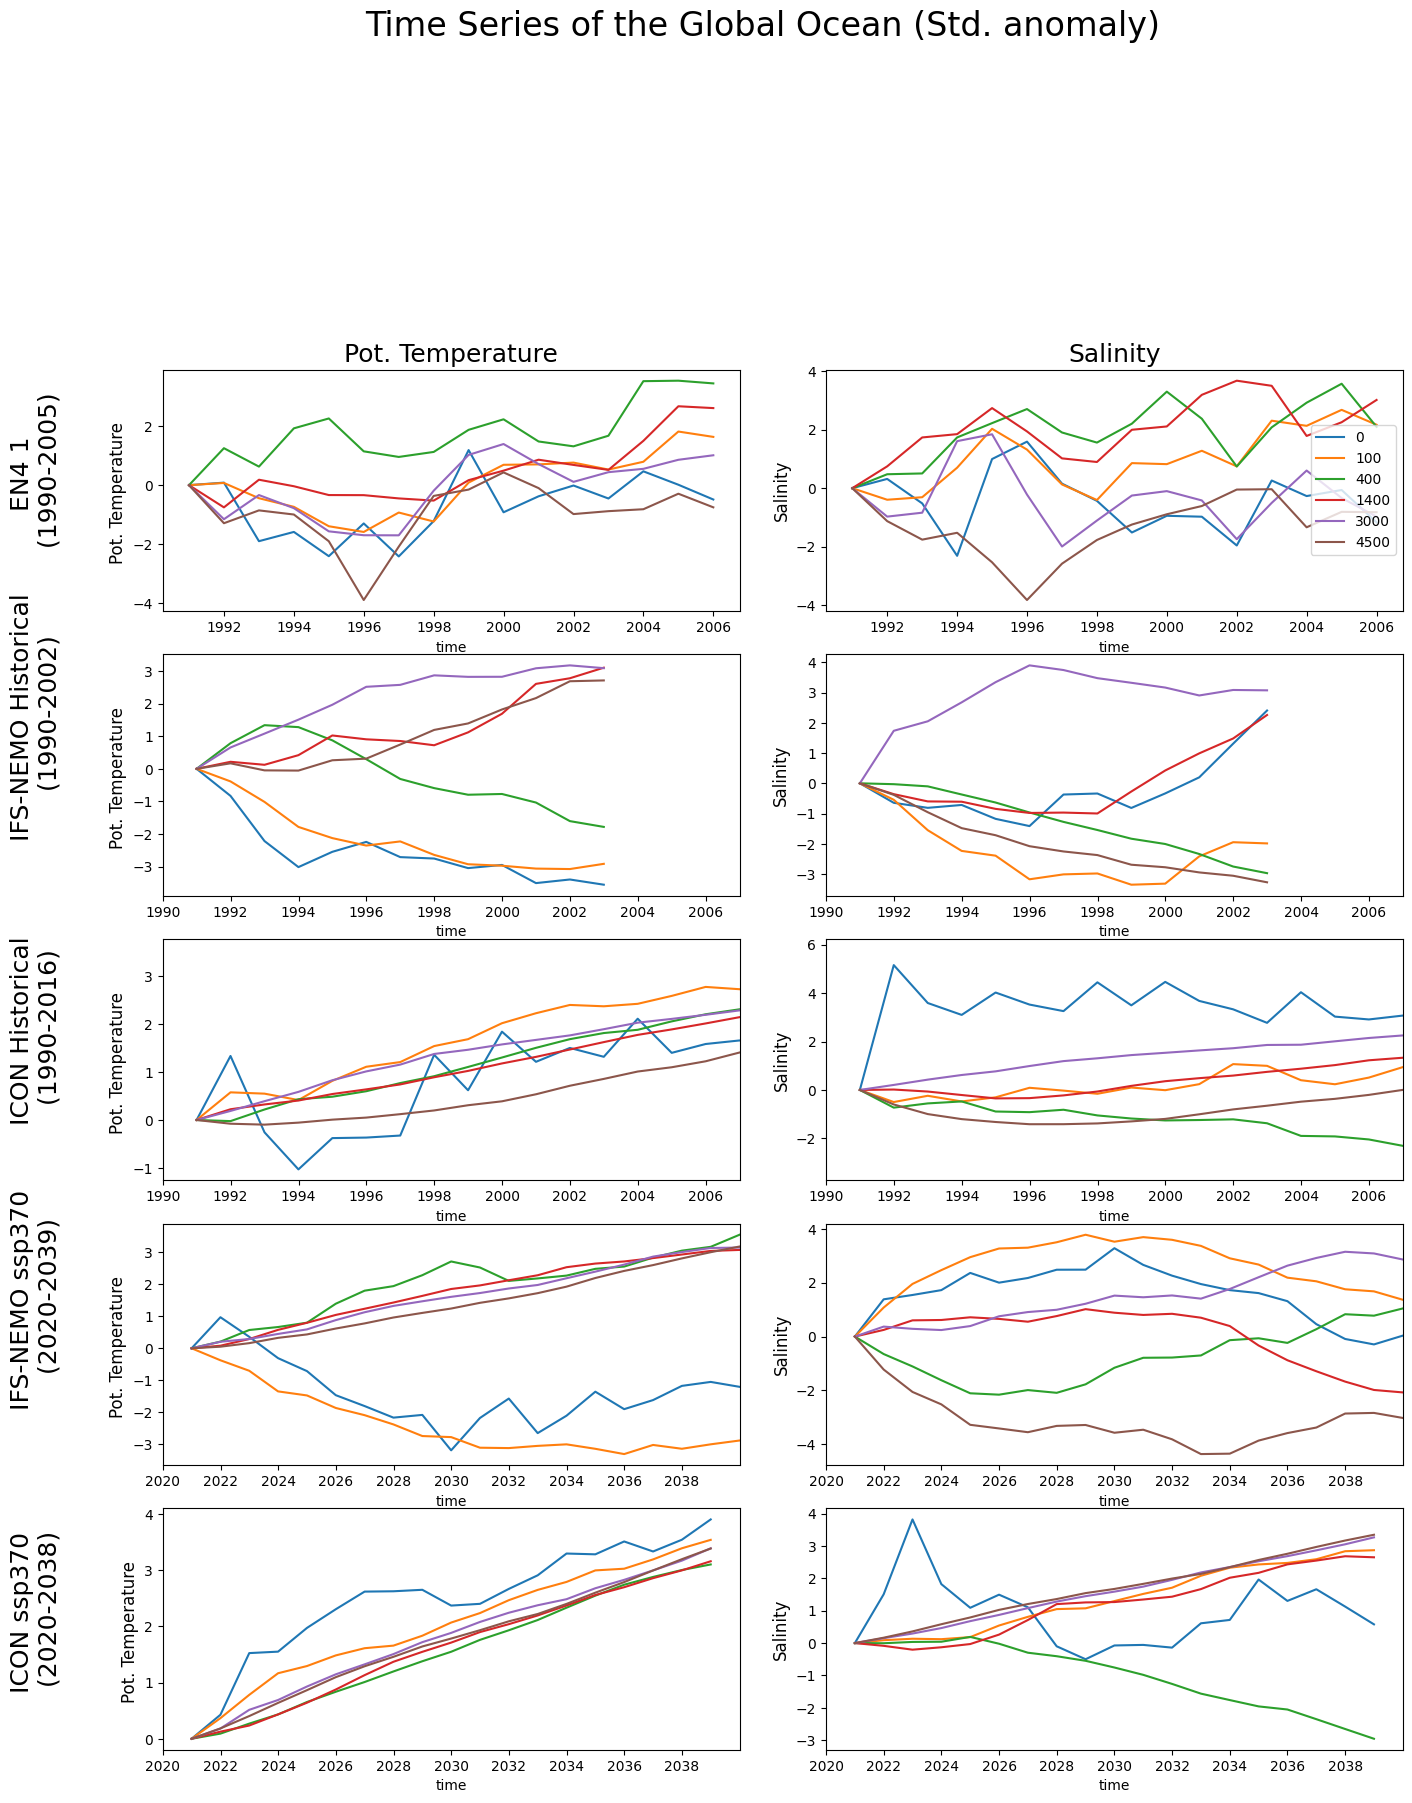

In [3]:
data_dict = {
            'EN4 1':en4_1.resample(time="1Y").mean(),
             'IFS-NEMO Historical':ifs_nemo_historical.resample(time="1Y").mean(),
             'ICON Historical':icon_historical.resample(time="1Y").mean(),
             'IFS-NEMO ssp370':ifs_nemo_ssp370.resample(time="1Y").mean(),
             'ICON ssp370':icon_ssp370.resample(time="1Y").mean()
             } 
o3d_request= {
'data_dict': data_dict,
'region':'Global Ocean',
'latS':None,
'latN':None,
'lonW':None,
'lonE':None,
'output':True,
'output_dir':'./output'}

timeser = time_series(o3d_request)
timeser.plot()

### 2. Maps of local (linear) trends in time
`trend(o3d_request)`
This function produces plots with the linear trends in time at the grid point levels for a given selected levels. It helps to compare to what extent long-term trends are comparable in the simulations and the observations.

It requires you to provide a data dictionary that specifies the datasets to be read and other details like the selected level (by default it selects the surface) or the region of choice. 

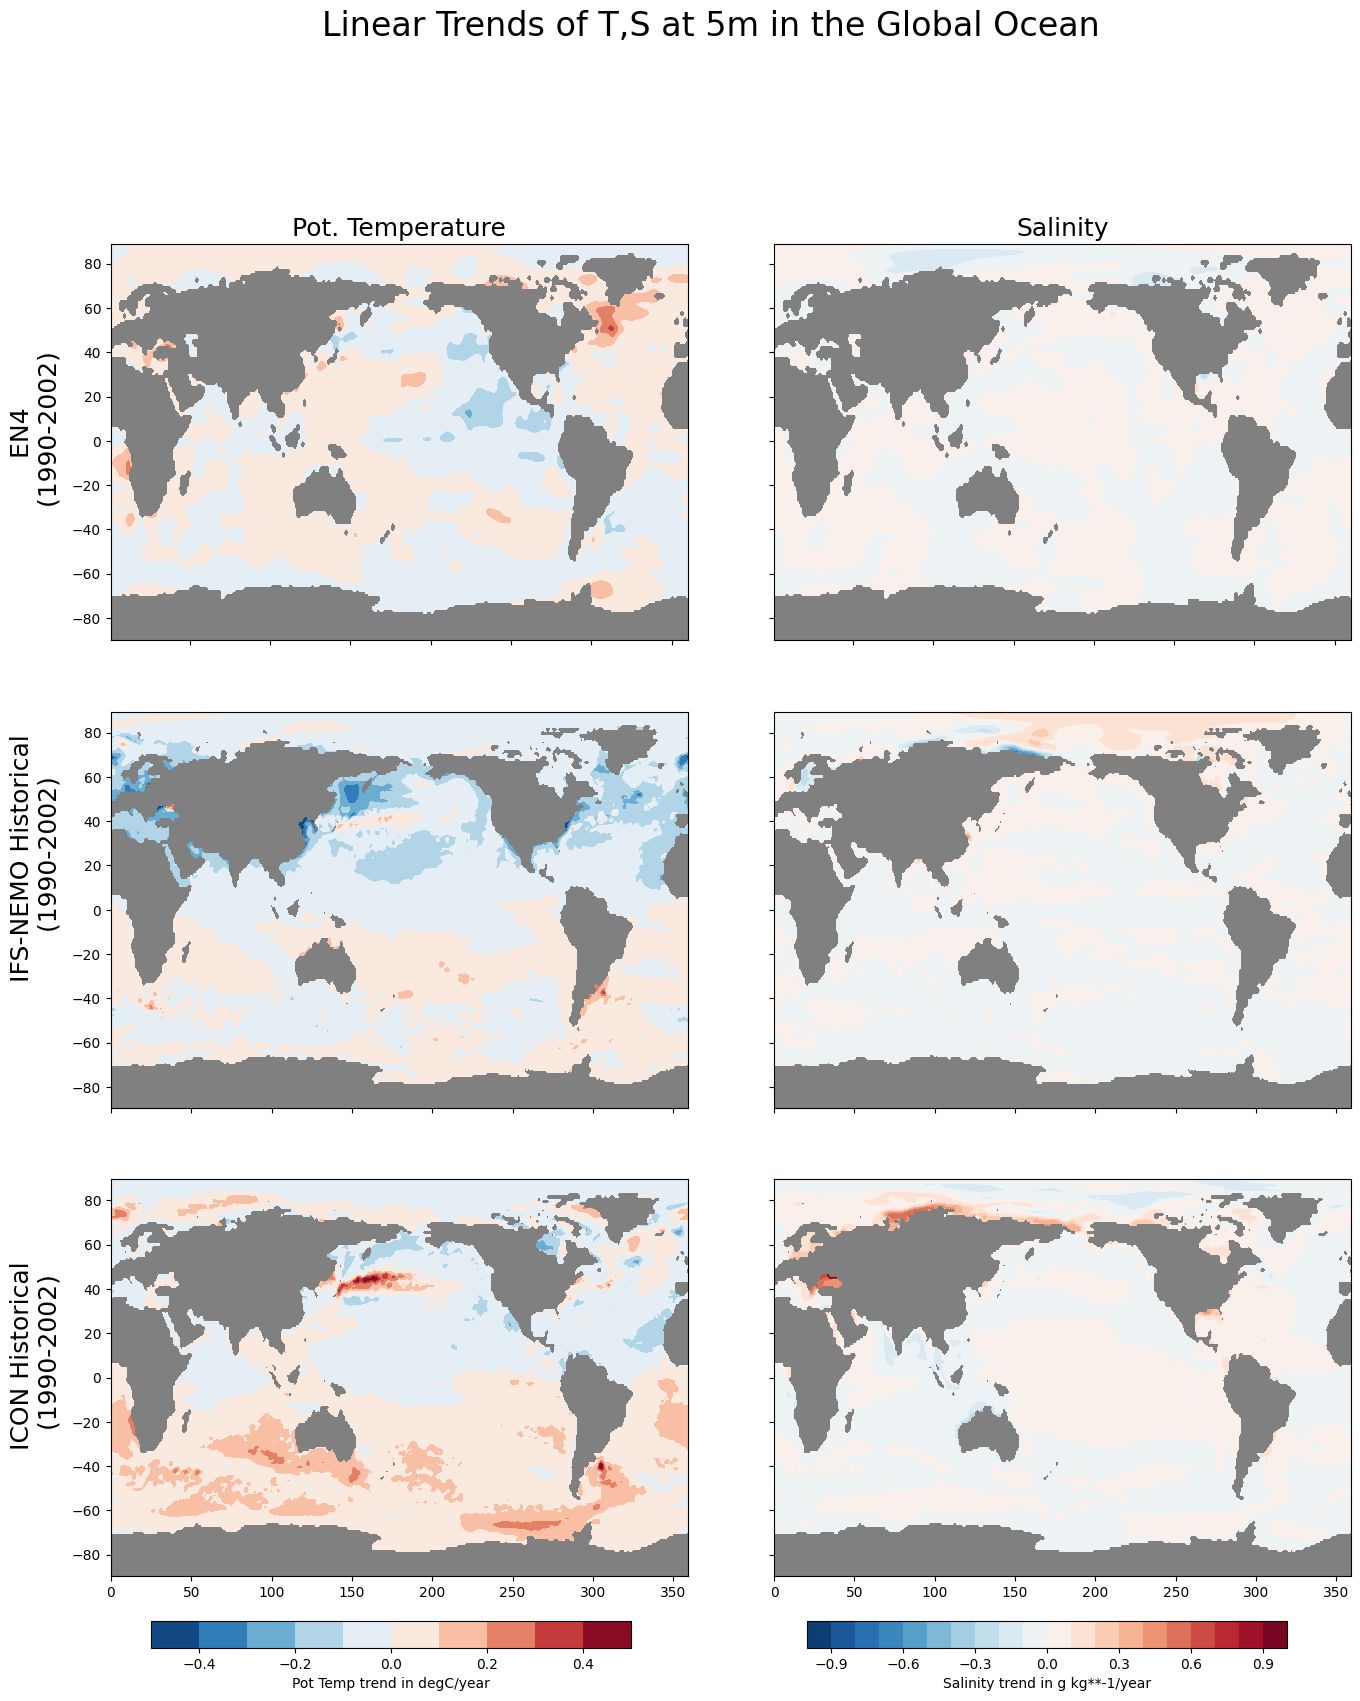

In [4]:
o3d_request["level"]= None
o3d_request["region"]="Global Ocean"

data_dict = {
            'EN4':en4_1.resample(time="1Y").mean().sel(time=slice("1990","2002")),
             'IFS-NEMO Historical':ifs_nemo_historical.resample(time="1Y").mean().sel(time=slice("1990","2002")),
             'ICON Historical':icon_historical.resample(time="1Y").mean().sel(time=slice("1990","2002")),
            #  'IFS-NEMO ssp370':ifs_nemo_ssp370.resample(time="1Y").mean(),
            #  'icon ssp370':icon_ssp370.resample(time="1Y").mean()
             } 
o3d_request["data_dict"] = data_dict

trend_plot = trend(o3d_request)
trend_plot.plot()

### 3. Stratification 
`stratification(o3d_request)`
This function produces climatological stratification plots of temperature, salinity and density over some regions of choice for a selected list of simulations and EN4 observations. In each panel, it produces as many lines as datasets of observations and simulations are considered.

It requires you to provide a data dictionary that specifies the datasets to be read and other details like the regions over which the stratification is computed and the period of the year over which the climatologies are computed. 


#### Example for Stratification in March in the Labrador and GIN Seas

In [3]:
data_dict = {
            'EN4 1': en4_1,
             'EN4 2': en4_2,
             'IFS-NEMO Historical':ifs_nemo_historical,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'ICON Historical':icon_historical,
             'ICON ssp370': icon_ssp370
             } 

region_list = ['Labrador Sea',
               # 'Gin Sea',
            #    'Ross Sea',
            #    'Weddell Sea'
               ]

o3d_request= {
'data_dict': data_dict,
'region_list': region_list,
'output':True,
"time" : "MAR",
'output_dir':'./output'}


strat = stratification(o3d_request)
strat.plot()

### 4. Mixed layer depth (MLD) 

`mld_multi_model(o3d_request)`

This function computes the mixed layer depth from monthly 3D ocean potential temperature and practical salinity, both for a a selection of simulations and EN4 observations, and plots their climatology. It allows the user to choose if climatologies
are computed over the whole simulated and observed period, or over their overlap periods.

It requires you to provide a data dictionary that specifies the datasets to be read, and other additional details like the region of interest, the temporal means and the output files. 

#### Example for MLD in March in the Labrador and GIN Seas areas

In [3]:
data_dict = {'EN4 1':en4_1,
             'EN4 2':en4_2,
             'IFS-NEMO Historical':ifs_nemo_historical,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'icon Historical':icon_historical,
             'icon ssp370': icon_ssp370
             } 
o3d_request= {
'data_dict': data_dict,
'region':'Labrador Gin Seas',
'latS':None,
'latN':None,
'lonW':None,
'lonE':None,
'output':True,
"time" : "March",
'output_dir':'./output'}

/LUMI_TYKKY_WMqtmhL/miniconda/envs/env1/lib/python3.12/site-packages/dask/array/reductions.py:654: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


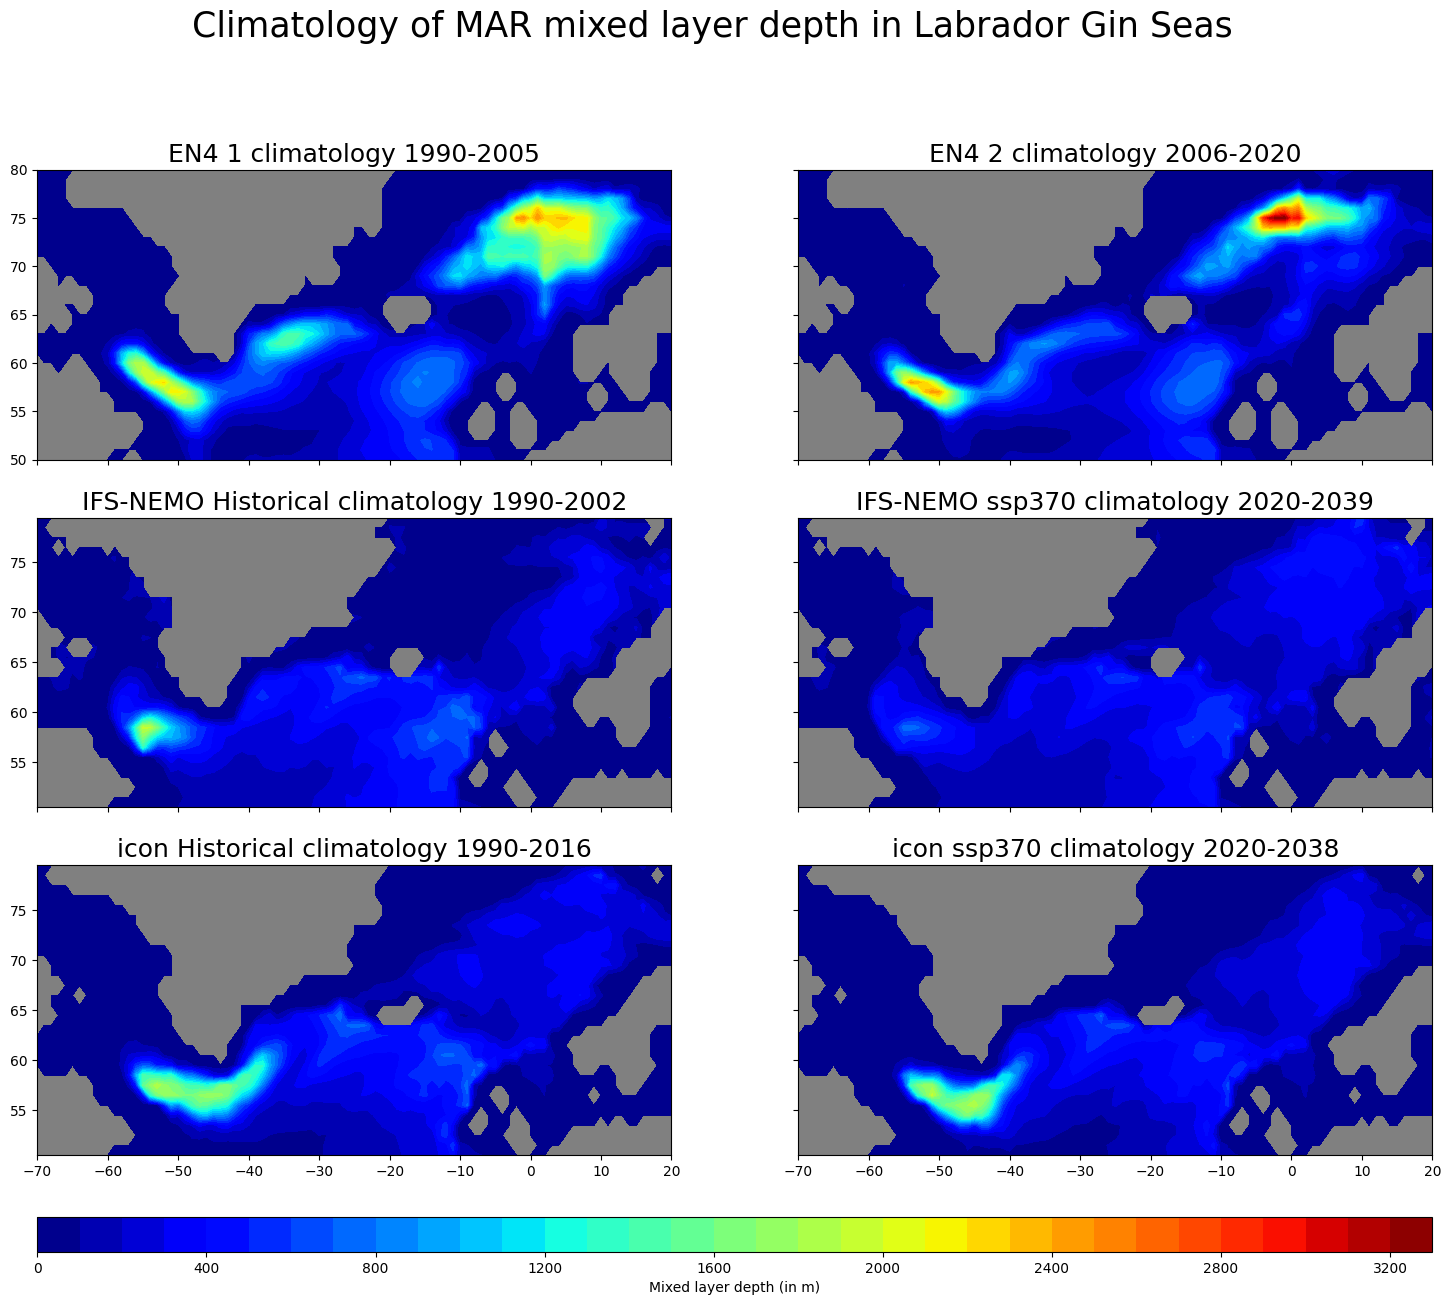

In [4]:
mld_multi_model(o3d_request)